In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
import statsmodels.api as sm
from ast import literal_eval

# Process data

In [2]:
path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/movie_cast_AND_dummy_vars.csv'
df = pd.read_csv(path)
df.head(2)

,Unnamed: 0,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,...,is_News,is_Musical,is_Drama,is_Biography,is_Sport,is_Fantasy,is_Action,is_Adventure,is_Documentary,is_Thriller
0,0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,...,False,False,False,False,False,False,False,False,False,False
1,1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,...,False,False,False,False,False,False,False,False,False,True


In [3]:
adj_money = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/budget_revenue_adj.csv'
revenue_budget_adj = pd.read_csv(adj_money)
revenue_budget_adj.head()

,tconst,primaryTitle,startYear,budget,revenue,CPI ratio 2019,budget_adj,revenue_adj
0,tt1179904,Paranormal Activity,2007,230000,194183034,1.232937,283575.559996,2.394155e+08
1,tt2309260,The Gallows,2015,100000,42664410,1.078565,107856.485741,4.601633e+07
2,tt0876294,Zombie Diaries,2006,9300,2000000,1.268145,11793.747972,2.536290e+06
3,tt0907657,Once,2007,160000,20710513,1.232937,197269.954780,2.553476e+07
4,tt0374900,Napoleon Dynamite,2004,400000,46118097,1.353498,541399.214962,6.242075e+07


In [4]:
adj_money_lookup = revenue_budget_adj[['tconst', 'budget_adj', 'revenue_adj']].set_index('tconst').to_dict(orient='index')

In [5]:
df['budget_adj'] = df.apply(lambda x: adj_money_lookup[x.tconst]['budget_adj'], axis=1)
df['revenue_adj'] = df.apply(lambda x: adj_money_lookup[x.tconst]['revenue_adj'], axis=1)

In [6]:
df.columns

Index(['Unnamed: 0', 'index', 'tconst', 'titleType', 'primaryTitle',
       'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes',
       'genres', 'tmdb_id', 'og_language', 'budget', 'revenue', 'ratio', 'ROI',
       'averageRating', 'numVotes', 'Unnamed: 18', 'nconst', 'genres_list',
       'is_Family', 'is_Music', 'is_Romance', 'is_War', 'is_Comedy',
       'is_Horror', 'is_Sci-Fi', 'is_History', 'is_Crime', 'is_Western',
       'is_Mystery', 'is_News', 'is_Musical', 'is_Drama', 'is_Biography',
       'is_Sport', 'is_Fantasy', 'is_Action', 'is_Adventure', 'is_Documentary',
       'is_Thriller', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [7]:
cols_to_drop = ['Unnamed: 0', 'index', 'titleType', 'originalTitle', 'isAdult', 'endYear', 'runtimeMinutes', 'tmdb_id', 'og_language', 'ratio', 'ROI', 'averageRating', 'numVotes', 'Unnamed: 18', 'budget', 'revenue']
df = df.drop(columns=cols_to_drop, axis=1)
df.head(2)

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Drama,is_Biography,is_Sport,is_Fantasy,is_Action,is_Adventure,is_Documentary,is_Thriller,budget_adj,revenue_adj
0,tt1179904,Paranormal Activity,2007,"Horror,Mystery","['nm2209370', 'nm2913790', 'nm2104166', 'nm291...","['Horror', 'Mystery']",False,False,False,False,...,False,False,False,False,False,False,False,False,283575.559996,2.394155e+08
1,tt2309260,The Gallows,2015,"Horror,Mystery,Thriller","['nm3790547', 'nm6018502', 'nm4090362', 'nm225...","['Horror', 'Mystery', 'Thriller']",False,False,False,False,...,False,False,False,False,False,False,False,True,107856.485741,4.601633e+07


In [8]:
impurity_idx_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/impurity_index.csv'
impurity_idx = pd.read_csv(impurity_idx_path)
impurity_idx.head()

,tconst,HL+M,HL+O,NL+M,NL+O,a,b,i,l,w,Total PC,Impurity Index
0,tt0035423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.000
1,tt0118589,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,0.750
2,tt0120467,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.375
3,tt0120667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,0.375
4,tt0120679,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,4.0,0.625


In [9]:
imp_idx_lookup = dict(zip(impurity_idx.tconst, impurity_idx['Impurity Index']))
df['d_race'] = df.apply(lambda x: imp_idx_lookup[x.tconst], axis=1)

In [10]:
starpower_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/starpowers_2.csv'
starpower = pd.read_csv(starpower_path)
print(starpower.shape)
starpower.head()

(3540, 5)


,tconst,nconst,starpowers,avg_starpowers_w0,max_starpowers
0,tt0035423,"['nm0000212', 'nm0413168', 'nm0000630', 'nm000...","[6.3428571428571425, 6.666666666666667, 6.4000...",6.402381,6.666667
1,tt0118589,"['nm0001014', 'nm0073160', 'nm0066586', 'nm000...","[0.0, 0.0, 6.0, 0.0]",1.500000,6.000000
2,tt0120467,"['nm0641168', 'nm0424682', 'nm0507915', 'nm083...","[7.7, 0.0, 0.0, 5.25]",3.237500,7.700000
3,tt0120667,"['nm0344435', 'nm0004821', 'nm0262635', 'nm000...","[6.05, 4.6000000000000005, 5.933333333333334, ...",5.514583,6.050000
4,tt0120679,"['nm0000161', 'nm0000547', 'nm0001691', 'nm053...","[5.869230769230768, 6.013333333333333, 6.58, 7.0]",6.365641,7.000000


In [11]:
starpower_avg_lookup = dict(zip(starpower['tconst'], starpower['avg_starpowers_w0']))
df['starpower_avg'] = df.apply(lambda x: starpower_avg_lookup[x.tconst], axis=1)
# df['starpower_avg'] = df['starpower_avg'].fillna(0)

In [12]:
df[df.starpower_avg.isna()]

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Sport,is_Fantasy,is_Action,is_Adventure,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg


In [13]:
starpower_max_lookup = dict(zip(starpower['tconst'], starpower['max_starpowers']))
df['starpower_max'] = df.apply(lambda x: starpower_max_lookup[x.tconst], axis=1)
# df['starpower_avg'] = df['starpower_avg'].fillna(0)

In [14]:
df[df.starpower_max.isna()]

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Fantasy,is_Action,is_Adventure,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max


In [15]:
cast_prop_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/cast_proportion.csv'
cast_prop = pd.read_csv(cast_prop_path)
print(cast_prop.shape)
cast_prop.head()

(3540, 6)


,tconst,actor,actress,actor_proportion,actress_proportion,actor_prop
0,tt0035423,3.0,1.0,0.75,0.25,higher
1,tt0118589,2.0,2.0,0.50,0.50,equal
2,tt0120467,4.0,0.0,1.00,0.00,higher
3,tt0120667,3.0,1.0,0.75,0.25,higher
4,tt0120679,2.0,2.0,0.50,0.50,equal


In [16]:
cast_prop_lookup = dict(zip(cast_prop.tconst, cast_prop.actor_proportion))
df['actor_proportion'] = df.apply(lambda x: cast_prop_lookup[x.tconst], axis=1)

In [17]:
df.head()

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Action,is_Adventure,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion
0,tt1179904,Paranormal Activity,2007,"Horror,Mystery","['nm2209370', 'nm2913790', 'nm2104166', 'nm291...","['Horror', 'Mystery']",False,False,False,False,...,False,False,False,False,283575.559996,2.394155e+08,0.625,0.0000,0.00,0.50
1,tt2309260,The Gallows,2015,"Horror,Mystery,Thriller","['nm3790547', 'nm6018502', 'nm4090362', 'nm225...","['Horror', 'Mystery', 'Thriller']",False,False,False,False,...,False,False,False,True,107856.485741,4.601633e+07,0.375,0.0000,0.00,0.50
2,tt0876294,Zombie Diaries,2006,"Horror,Sci-Fi","['nm0014714', 'nm2428131', 'nm2408572', 'nm028...","['Horror', 'Sci-Fi']",False,False,False,False,...,False,False,False,False,11793.747972,2.536290e+06,0.500,0.0000,0.00,0.50
3,tt0907657,Once,2007,"Drama,Music,Romance","['nm0360598', 'nm2461627', 'nm2008013', 'nm247...","['Drama', 'Music', 'Romance']",False,True,True,False,...,False,False,False,False,197269.954780,2.553476e+07,0.625,0.0000,0.00,0.75
4,tt0374900,Napoleon Dynamite,2004,Comedy,"['nm1417647', 'nm0708293', 'nm0340973', 'nm108...",['Comedy'],False,False,False,False,...,False,False,False,False,541399.214962,6.242075e+07,0.625,1.3625,5.45,1.00


In [18]:
df.columns

Index(['tconst', 'primaryTitle', 'startYear', 'genres', 'nconst',
       'genres_list', 'is_Family', 'is_Music', 'is_Romance', 'is_War',
       'is_Comedy', 'is_Horror', 'is_Sci-Fi', 'is_History', 'is_Crime',
       'is_Western', 'is_Mystery', 'is_News', 'is_Musical', 'is_Drama',
       'is_Biography', 'is_Sport', 'is_Fantasy', 'is_Action', 'is_Adventure',
       'is_Documentary', 'is_Thriller', 'budget_adj', 'revenue_adj', 'd_race',
       'starpower_avg', 'starpower_max', 'actor_proportion'],
      dtype='object')

# Test regression #1
- Dependent variable: revenue_adj
- Independent variables:
  - d_race -- impurity index for race/ethnicity
  - starpower (avg w/0, max)
  - actor_proportion (proportion of actors (male) out of all principal cast)
- Control variables:
  - genres

In [19]:
df['Intercept'] = 1
df.head(2)

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Adventure,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,Intercept
0,tt1179904,Paranormal Activity,2007,"Horror,Mystery","['nm2209370', 'nm2913790', 'nm2104166', 'nm291...","['Horror', 'Mystery']",False,False,False,False,...,False,False,False,283575.559996,2.394155e+08,0.625,0.0,0.0,0.5,1
1,tt2309260,The Gallows,2015,"Horror,Mystery,Thriller","['nm3790547', 'nm6018502', 'nm4090362', 'nm225...","['Horror', 'Mystery', 'Thriller']",False,False,False,False,...,False,False,True,107856.485741,4.601633e+07,0.375,0.0,0.0,0.5,1


In [20]:
bool_cols = ['is_Family', 'is_Music', 'is_Romance', 'is_War',
       'is_Comedy', 'is_Horror', 'is_Sci-Fi', 'is_History', 'is_Crime',
       'is_Western', 'is_Mystery', 'is_News', 'is_Musical', 'is_Drama',
       'is_Biography', 'is_Sport', 'is_Fantasy', 'is_Action', 'is_Adventure',
       'is_Documentary', 'is_Thriller']
len(bool_cols)

21

In [21]:
for col in bool_cols:
  df[col] = df[col].astype(int)

In [22]:
df.head(2)

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Adventure,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,Intercept
0,tt1179904,Paranormal Activity,2007,"Horror,Mystery","['nm2209370', 'nm2913790', 'nm2104166', 'nm291...","['Horror', 'Mystery']",0,0,0,0,...,0,0,0,283575.559996,2.394155e+08,0.625,0.0,0.0,0.5,1
1,tt2309260,The Gallows,2015,"Horror,Mystery,Thriller","['nm3790547', 'nm6018502', 'nm4090362', 'nm225...","['Horror', 'Mystery', 'Thriller']",0,0,0,0,...,0,0,1,107856.485741,4.601633e+07,0.375,0.0,0.0,0.5,1


In [23]:
y = df[['revenue_adj']]

In [24]:
cols_to_drop_X = ['tconst', 'primaryTitle', 'startYear', 'genres', 'nconst', 'genres_list', 'budget_adj', 'revenue_adj']
X = df.drop(columns=cols_to_drop_X, axis=1)

In [25]:
X.head()

,is_Family,is_Music,is_Romance,is_War,is_Comedy,is_Horror,is_Sci-Fi,is_History,is_Crime,is_Western,...,is_Fantasy,is_Action,is_Adventure,is_Documentary,is_Thriller,d_race,starpower_avg,starpower_max,actor_proportion,Intercept
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0.625,0.0000,0.00,0.50,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0.375,0.0000,0.00,0.50,1
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0.500,0.0000,0.00,0.50,1
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.625,0.0000,0.00,0.75,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0.625,1.3625,5.45,1.00,1


In [26]:
mod = sm.OLS(y, X)
res = mod.fit()

In [27]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            revenue_adj   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     48.90
Date:                Wed, 07 Dec 2022   Prob (F-statistic):          4.35e-206
Time:                        20:01:08   Log-Likelihood:                -72530.
No. Observations:                3540   AIC:                         1.451e+05
Df Residuals:                    3514   BIC:                         1.453e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
is_Family         3.891e+07    1.5e+07  

In [28]:
coefs = pd.DataFrame(res.params, columns=['coefs']).reset_index().rename(columns={'index': 'coef names'})
coefs['std errors'] = res.bse.values
coefs['diff'] = abs(coefs['coefs']) - 2 * coefs['std errors']
coefs['significant'] = coefs['diff'] > 0
coefs['p_values'] = res.pvalues.values

pd.options.display.float_format = '{:.5f}'.format
coefs

,coef names,coefs,std errors,diff,significant,p_values
0,is_Family,38908475.15413,15028480.32584,8851514.50244,True,0.00967
1,is_Music,11007265.04273,18928952.52538,-26850640.00804,False,0.56094
2,is_Romance,4214943.42428,10182376.35023,-16149809.27619,False,0.67894
3,is_War,-35880749.68816,29859712.02502,-23838674.36189,False,0.22958
4,is_Comedy,-43549693.74915,9740900.85040,24067892.04835,True,0.00001
5,is_Horror,-53127799.75552,12304150.38077,28519498.99398,True,0.00002
6,is_Sci-Fi,95037000.01407,13107843.06316,68821313.88774,True,0.00000
7,is_History,-19805888.80747,18855581.72030,-17905274.63312,False,0.29361
8,is_Crime,-31805722.73832,9502662.94768,12800396.84295,True,0.00083
9,is_Western,-56575257.12432,41563421.81266,-26551586.50099,False,0.17354


# Test regression #2 - Budget
- Dependent variable: revenue_adj
- Independent variables:
  - d_race -- impurity index for race/ethnicity
  - starpower (avg w/0, max)
  - actor_proportion (proportion of actors (male) out of all principal cast)
  - budget
- Control variables:
  - genres

In [29]:
df['Intercept'] = 1
df.head(2)

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Adventure,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,Intercept
0,tt1179904,Paranormal Activity,2007,"Horror,Mystery","['nm2209370', 'nm2913790', 'nm2104166', 'nm291...","['Horror', 'Mystery']",0,0,0,0,...,0,0,0,283575.56000,239415489.60101,0.62500,0.00000,0.00000,0.50000,1
1,tt2309260,The Gallows,2015,"Horror,Mystery,Thriller","['nm3790547', 'nm6018502', 'nm4090362', 'nm225...","['Horror', 'Mystery', 'Thriller']",0,0,0,0,...,0,0,1,107856.48574,46016333.28795,0.37500,0.00000,0.00000,0.50000,1


In [30]:
bool_cols = ['is_Family', 'is_Music', 'is_Romance', 'is_War',
       'is_Comedy', 'is_Horror', 'is_Sci-Fi', 'is_History', 'is_Crime',
       'is_Western', 'is_Mystery', 'is_News', 'is_Musical', 'is_Drama',
       'is_Biography', 'is_Sport', 'is_Fantasy', 'is_Action', 'is_Adventure',
       'is_Documentary', 'is_Thriller']
len(bool_cols)

21

In [31]:
for col in bool_cols:
  df[col] = df[col].astype(int)

In [32]:
df.head(2)

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Adventure,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,Intercept
0,tt1179904,Paranormal Activity,2007,"Horror,Mystery","['nm2209370', 'nm2913790', 'nm2104166', 'nm291...","['Horror', 'Mystery']",0,0,0,0,...,0,0,0,283575.56000,239415489.60101,0.62500,0.00000,0.00000,0.50000,1
1,tt2309260,The Gallows,2015,"Horror,Mystery,Thriller","['nm3790547', 'nm6018502', 'nm4090362', 'nm225...","['Horror', 'Mystery', 'Thriller']",0,0,0,0,...,0,0,1,107856.48574,46016333.28795,0.37500,0.00000,0.00000,0.50000,1


In [33]:
y = df[['revenue_adj']]

In [34]:
cols_to_drop_X = ['tconst', 'primaryTitle', 'startYear', 'genres', 'nconst', 'genres_list', 'revenue_adj']
X = df.drop(columns=cols_to_drop_X, axis=1)

In [36]:
X.head()

,is_Family,is_Music,is_Romance,is_War,is_Comedy,is_Horror,is_Sci-Fi,is_History,is_Crime,is_Western,...,is_Action,is_Adventure,is_Documentary,is_Thriller,budget_adj,d_race,starpower_avg,starpower_max,actor_proportion,Intercept
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,283575.56000,0.62500,0.00000,0.00000,0.50000,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,107856.48574,0.37500,0.00000,0.00000,0.50000,1
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,11793.74797,0.50000,0.00000,0.00000,0.50000,1
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,197269.95478,0.62500,0.00000,0.00000,0.75000,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,541399.21496,0.62500,1.36250,5.45000,1.00000,1


In [37]:
mod = sm.OLS(y, X)
res = mod.fit()

In [38]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            revenue_adj   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     187.6
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:01:55   Log-Likelihood:                -71517.
No. Observations:                3540   AIC:                         1.431e+05
Df Residuals:                    3513   BIC:                         1.433e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
is_Family        -2.377e+07   1.14e+07  

In [39]:
coefs = pd.DataFrame(res.params, columns=['coefs']).reset_index().rename(columns={'index': 'coef names'})
coefs['std errors'] = res.bse.values
coefs['diff'] = abs(coefs['coefs']) - 2 * coefs['std errors']
coefs['significant'] = coefs['diff'] > 0
coefs['p_values'] = res.pvalues.values

pd.options.display.float_format = '{:.5f}'.format
coefs

,coef names,coefs,std errors,diff,significant,p_values
0,is_Family,-23773578.47132,11354862.70830,1063853.05472,True,0.03636
1,is_Music,1715074.22716,14222444.28762,-26729814.34808,False,0.90402
2,is_Romance,-5857063.92035,7652465.02980,-9447866.13925,False,0.44410
3,is_War,-54177651.79151,22436357.20719,9304937.37713,True,0.01580
4,is_Comedy,-16881947.57743,7336231.17268,2209485.23207,True,0.02144
5,is_Horror,7854587.64169,9317970.53930,-10781353.43691,False,0.39931
6,is_Sci-Fi,-919713.90769,10018789.88862,-19117865.86956,False,0.92686
7,is_History,-44504402.35637,14174137.01962,16156128.31713,True,0.00170
8,is_Crime,-16680272.24717,7145256.67848,2389758.89021,True,0.01963
9,is_Western,-54446662.01420,31226632.45314,-8006602.89208,False,0.08132


# Test regression #3 - Scale money down
- Dependent variable: revenue_adj
- Independent variables:
  - d_race -- impurity index for race/ethnicity
  - starpower (avg w/0, max)
  - actor_proportion (proportion of actors (male) out of all principal cast)
  - budget (as values)
- Control variables:
  - genres

In [ ]:
df['Intercept'] = 1
df.head(2)

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Adventure,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,Intercept
0,tt1179904,Paranormal Activity,2007,"Horror,Mystery","['nm2209370', 'nm2913790', 'nm2104166', 'nm291...","['Horror', 'Mystery']",0,0,0,0,...,0,0,0,283575.56000,239415489.60101,0.62500,0.00000,0.00000,0.50000,1
1,tt2309260,The Gallows,2015,"Horror,Mystery,Thriller","['nm3790547', 'nm6018502', 'nm4090362', 'nm225...","['Horror', 'Mystery', 'Thriller']",0,0,0,0,...,0,0,1,107856.48574,46016333.28795,0.37500,0.00000,0.00000,0.50000,1


In [ ]:
bool_cols = ['is_Family', 'is_Music', 'is_Romance', 'is_War',
       'is_Comedy', 'is_Horror', 'is_Sci-Fi', 'is_History', 'is_Crime',
       'is_Western', 'is_Mystery', 'is_News', 'is_Musical', 'is_Drama',
       'is_Biography', 'is_Sport', 'is_Fantasy', 'is_Action', 'is_Adventure',
       'is_Documentary', 'is_Thriller']
len(bool_cols)

21

In [ ]:
for col in bool_cols:
  df[col] = df[col].astype(int)

In [ ]:
df.head(2)

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Adventure,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,Intercept
0,tt1179904,Paranormal Activity,2007,"Horror,Mystery","['nm2209370', 'nm2913790', 'nm2104166', 'nm291...","['Horror', 'Mystery']",0,0,0,0,...,0,0,0,283575.56000,239415489.60101,0.62500,0.00000,0.00000,0.50000,1
1,tt2309260,The Gallows,2015,"Horror,Mystery,Thriller","['nm3790547', 'nm6018502', 'nm4090362', 'nm225...","['Horror', 'Mystery', 'Thriller']",0,0,0,0,...,0,0,1,107856.48574,46016333.28795,0.37500,0.00000,0.00000,0.50000,1


In [ ]:
y = df[['revenue_adj']] / 10000000
y.head()

,revenue_adj
0,23.94155
1,4.60163
2,0.25363
3,2.55348
4,6.24208


In [ ]:
cols_to_drop_X = ['tconst', 'primaryTitle', 'startYear', 'genres', 'nconst', 'genres_list', 'revenue_adj']
X = df.drop(columns=cols_to_drop_X, axis=1)
X['budget_adj'] = X['budget_adj'] / 10000000

In [ ]:
X.head()

,is_Family,is_Music,is_Romance,is_War,is_Comedy,is_Horror,is_Sci-Fi,is_History,is_Crime,is_Western,...,is_Action,is_Adventure,is_Documentary,is_Thriller,budget_adj,d_race,starpower_avg,starpower_max,actor_proportion,Intercept
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0.02836,0.62500,0.00000,0.00000,0.50000,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0.01079,0.37500,0.00000,0.00000,0.50000,1
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0.00118,0.50000,0.00000,0.00000,0.50000,1
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0.01973,0.62500,0.00000,0.00000,0.75000,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0.05414,0.62500,1.36250,5.45000,1.00000,1


In [ ]:
mod = sm.OLS(y, X)
res = mod.fit()

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            revenue_adj   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     187.6
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:15:18   Log-Likelihood:                -14459.
No. Observations:                3540   AIC:                         2.897e+04
Df Residuals:                    3513   BIC:                         2.914e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
is_Family           -2.3774      1.135  

In [ ]:
coefs = pd.DataFrame(res.params, columns=['coefs']).reset_index().rename(columns={'index': 'coef names'})
coefs['std errors'] = res.bse.values
coefs['diff'] = abs(coefs['coefs']) - 2 * coefs['std errors']
coefs['significant'] = coefs['diff'] > 0
coefs['p_values'] = res.pvalues.values

pd.options.display.float_format = '{:.5f}'.format
coefs

,coef names,coefs,std errors,diff,significant,p_values
0,is_Family,-2.37736,1.13549,0.10639,True,0.03636
1,is_Music,0.17151,1.42224,-2.67298,False,0.90402
2,is_Romance,-0.58571,0.76525,-0.94479,False,0.44410
3,is_War,-5.41777,2.24364,0.93049,True,0.01580
4,is_Comedy,-1.68819,0.73362,0.22095,True,0.02144
5,is_Horror,0.78546,0.93180,-1.07814,False,0.39931
6,is_Sci-Fi,-0.09197,1.00188,-1.91179,False,0.92686
7,is_History,-4.45044,1.41741,1.61561,True,0.00170
8,is_Crime,-1.66803,0.71453,0.23898,True,0.01963
9,is_Western,-5.44467,3.12266,-0.80066,False,0.08132


# Budget & genre

## Drama

In [ ]:
df_drama = df[df.is_Drama == 1]
print(df_drama.shape)
df_drama.head()

(1884, 34)


,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Adventure,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,Intercept
3,tt0907657,Once,2007,"Drama,Music,Romance","['nm0360598', 'nm2461627', 'nm2008013', 'nm247...","['Drama', 'Music', 'Romance']",0,1,1,0,...,0,0,0,197269.95478,25534762.26859,0.62500,0.00000,0.00000,0.75000,1
6,tt0374102,Open Water,2003,"Adventure,Drama,Horror","['nm0752436', 'nm1047403', 'nm0825627', 'nm167...","['Adventure', 'Drama', 'Horror']",0,0,0,0,...,1,0,0,694879.08962,75975236.21337,0.75000,1.63750,6.55000,0.75000,1
7,tt0805526,Facing the Giants,2006,"Drama,Fantasy,Sport","['nm1731937', 'nm2266388', 'nm2264285', 'nm172...","['Drama', 'Fantasy', 'Sport']",0,0,0,0,...,0,0,0,126814.49432,12907598.98799,0.62500,0.00000,0.00000,0.75000,1
10,tt8637428,The Farewell,2019,"Comedy,Drama","['nm10289762', 'nm5377144', 'nm5619620', 'nm10...","['Comedy', 'Drama']",0,0,0,0,...,0,0,0,250300.00000,22110994.00000,0.37500,1.45000,5.80000,0.00000,1
13,tt0390384,Primer,2004,"Drama,Sci-Fi,Thriller","['nm1503403', 'nm1503383', 'nm1503463', 'nm088...","['Drama', 'Sci-Fi', 'Thriller']",0,0,0,0,...,0,0,1,9474.48626,738246.55553,0.62500,0.00000,0.00000,1.00000,1


In [ ]:
for n in np.quantile(df_drama.budget_adj, [0.2, 0.4, 0.6, 0.8, 1.0]):
  print(n)

5939209.7264437685
14678866.227219857
26996407.84747168
47931316.43499591
356000000.0


In [ ]:
pd.qcut(df_drama.budget_adj, [0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

3       (3082.3419999999996, 5939209.726]
6       (3082.3419999999996, 5939209.726]
7       (3082.3419999999996, 5939209.726]
10      (3082.3419999999996, 5939209.726]
13      (3082.3419999999996, 5939209.726]
                      ...                
3527          (5939209.726, 14678866.227]
3532          (5939209.726, 14678866.227]
3533         (14678866.227, 26996407.847]
3534          (5939209.726, 14678866.227]
3538          (5939209.726, 14678866.227]
Name: budget_adj, Length: 1884, dtype: category
Categories (5, interval[float64, right]): [(3082.3419999999996, 5939209.726] < (5939209.726, 14678866.227] <
                                           (14678866.227, 26996407.847] < (26996407.847, 47931316.435] <
                                           (47931316.435, 356000000.0]]

In [ ]:
budget_bins, bins = pd.qcut(df_drama.budget_adj, [0.0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=[0, 1, 2, 3, 4], retbins=True)

In [ ]:
bins

array([3.08234304e+03, 5.93920973e+06, 1.46788662e+07, 2.69964078e+07,
       4.79313164e+07, 3.56000000e+08])

In [ ]:
df_drama['budget_bins'] = budget_bins
df_drama.head()

<ipython-input-174-6dd283c5cf8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drama['budget_bins'] = budget_bins


,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,Intercept,budget_bins
3,tt0907657,Once,2007,"Drama,Music,Romance","['nm0360598', 'nm2461627', 'nm2008013', 'nm247...","['Drama', 'Music', 'Romance']",0,1,1,0,...,0,0,197269.95478,25534762.26859,0.62500,0.00000,0.00000,0.75000,1,0
6,tt0374102,Open Water,2003,"Adventure,Drama,Horror","['nm0752436', 'nm1047403', 'nm0825627', 'nm167...","['Adventure', 'Drama', 'Horror']",0,0,0,0,...,0,0,694879.08962,75975236.21337,0.75000,1.63750,6.55000,0.75000,1,0
7,tt0805526,Facing the Giants,2006,"Drama,Fantasy,Sport","['nm1731937', 'nm2266388', 'nm2264285', 'nm172...","['Drama', 'Fantasy', 'Sport']",0,0,0,0,...,0,0,126814.49432,12907598.98799,0.62500,0.00000,0.00000,0.75000,1,0
10,tt8637428,The Farewell,2019,"Comedy,Drama","['nm10289762', 'nm5377144', 'nm5619620', 'nm10...","['Comedy', 'Drama']",0,0,0,0,...,0,0,250300.00000,22110994.00000,0.37500,1.45000,5.80000,0.00000,1,0
13,tt0390384,Primer,2004,"Drama,Sci-Fi,Thriller","['nm1503403', 'nm1503383', 'nm1503463', 'nm088...","['Drama', 'Sci-Fi', 'Thriller']",0,0,0,0,...,0,1,9474.48626,738246.55553,0.62500,0.00000,0.00000,1.00000,1,0


In [ ]:
for i in range(5):
  df_drama[f'budget_bin_{i}'] = (df_drama.budget_bins == i).astype(int)

<ipython-input-175-50a2e949b823>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drama[f'budget_bin_{i}'] = (df_drama.budget_bins == i).astype(int)


In [ ]:
df_drama.tail()

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,starpower_avg,starpower_max,actor_proportion,Intercept,budget_bins,budget_bin_0,budget_bin_1,budget_bin_2,budget_bin_3,budget_bin_4
3527,tt4400994,The Ballad of Lefty Brown,2017,"Action,Drama,Western","['nm0000597', 'nm0001228', 'nm5413616', 'nm000...","['Action', 'Drama', 'Western']",0,0,0,0,...,4.38990,6.18824,0.75000,1,1,0,1,0,0,0
3532,tt2436682,The Duel,2016,"Drama,Western","['nm0000437', 'nm2955013', 'nm0103797', 'nm171...","['Drama', 'Western']",0,0,0,0,...,6.31042,6.47500,0.75000,1,1,0,1,0,0,0
3533,tt6749318,Speed Kills,2018,"Action,Crime,Drama","['nm0000237', 'nm0935395', 'nm0261170', 'nm092...","['Action', 'Crime', 'Drama']",0,0,0,0,...,5.33102,5.90408,0.50000,1,2,0,0,1,0,0
3534,tt5208950,Kickboxer: Retaliation,2018,"Action,Drama","['nm3857692', 'nm1523899', 'nm3767676', 'nm193...","['Action', 'Drama']",0,0,0,0,...,2.06875,4.80000,0.75000,1,1,0,1,0,0,0
3538,tt0254703,The Point Men,2001,"Action,Drama","['nm0000483', 'nm0289098', 'nm0716490', 'nm053...","['Action', 'Drama']",0,0,0,0,...,4.56284,6.64444,0.75000,1,1,0,1,0,0,0


In [ ]:
y = df_drama[['revenue_adj']]
print(y.shape)
y.head()

(1884, 1)


,revenue_adj
3,25534762.26859
6,75975236.21337
7,12907598.98799
10,22110994.00000
13,738246.55553


In [ ]:
cols_to_drop_X = ['tconst', 'primaryTitle', 'startYear', 'genres', 'nconst', 'genres_list', 'revenue_adj', 'budget_adj', 'budget_bins', 'is_Drama']
X = df_drama.drop(columns=cols_to_drop_X, axis=1)

In [ ]:
print(X.shape)
X.head()

(1884, 30)


,is_Family,is_Music,is_Romance,is_War,is_Comedy,is_Horror,is_Sci-Fi,is_History,is_Crime,is_Western,...,d_race,starpower_avg,starpower_max,actor_proportion,Intercept,budget_bin_0,budget_bin_1,budget_bin_2,budget_bin_3,budget_bin_4
3,0,1,1,0,0,0,0,0,0,0,...,0.62500,0.00000,0.00000,0.75000,1,1,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0.75000,1.63750,6.55000,0.75000,1,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0.62500,0.00000,0.00000,0.75000,1,1,0,0,0,0
10,0,0,0,0,1,0,0,0,0,0,...,0.37500,1.45000,5.80000,0.00000,1,1,0,0,0,0
13,0,0,0,0,0,0,1,0,0,0,...,0.62500,0.00000,0.00000,1.00000,1,1,0,0,0,0


In [ ]:
mod = sm.OLS(y, X)
res = mod.fit()

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            revenue_adj   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     29.02
Date:                Sat, 03 Dec 2022   Prob (F-statistic):          1.01e-117
Time:                        18:15:38   Log-Likelihood:                -37845.
No. Observations:                1884   AIC:                         7.574e+04
Df Residuals:                    1857   BIC:                         7.589e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
is_Family         4.661e+06   1.68e+07  

In [ ]:
coefs = pd.DataFrame(res.params, columns=['coefs']).reset_index().rename(columns={'index': 'coef names'})
coefs['std errors'] = res.bse.values
coefs['diff'] = abs(coefs['coefs']) - 2 * coefs['std errors']
coefs['significant'] = coefs['diff'] > 0
coefs['p_values'] = res.pvalues.values

pd.options.display.float_format = '{:.5f}'.format
coefs

,coef names,coefs,std errors,diff,significant,p_values
0,is_Family,4660549.15802,16790859.85943,-28921170.56085,False,0.78138
1,is_Music,8189743.43851,14926849.85008,-21663956.26166,False,0.58331
2,is_Romance,1307065.16068,8543723.28202,-15780381.40335,False,0.87843
3,is_War,-40487690.74406,22271669.04013,-4055647.33620,False,0.06924
4,is_Comedy,-7971414.87066,8306731.02646,-8642047.18226,False,0.33736
5,is_Horror,5924263.98648,14523044.91566,-23121825.84484,False,0.68338
6,is_Sci-Fi,38188578.30953,16425020.85299,5338536.60355,True,0.02018
7,is_History,-23169328.76911,13599486.23898,-4029643.70885,False,0.08861
8,is_Crime,-19059026.06656,8858068.54546,1342888.97564,True,0.03156
9,is_Western,-4900307.44430,35293321.69528,-65686335.94627,False,0.88959


In [ ]:
df_drama.budget_bins.value_counts()

2    379
0    378
1    376
4    376
3    375
Name: budget_bins, dtype: int64

## Binning with equal intervals instead of equal bins (based on values instead of on number of movies)

In [ ]:
df_drama = df[df.is_Drama == 1]
print(df_drama.shape)
df_drama.head()

(1884, 34)


,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Adventure,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,Intercept
3,tt0907657,Once,2007,"Drama,Music,Romance","['nm0360598', 'nm2461627', 'nm2008013', 'nm247...","['Drama', 'Music', 'Romance']",0,1,1,0,...,0,0,0,197269.95478,25534762.26859,0.62500,0.00000,0.00000,0.75000,1
6,tt0374102,Open Water,2003,"Adventure,Drama,Horror","['nm0752436', 'nm1047403', 'nm0825627', 'nm167...","['Adventure', 'Drama', 'Horror']",0,0,0,0,...,1,0,0,694879.08962,75975236.21337,0.75000,1.63750,6.55000,0.75000,1
7,tt0805526,Facing the Giants,2006,"Drama,Fantasy,Sport","['nm1731937', 'nm2266388', 'nm2264285', 'nm172...","['Drama', 'Fantasy', 'Sport']",0,0,0,0,...,0,0,0,126814.49432,12907598.98799,0.62500,0.00000,0.00000,0.75000,1
10,tt8637428,The Farewell,2019,"Comedy,Drama","['nm10289762', 'nm5377144', 'nm5619620', 'nm10...","['Comedy', 'Drama']",0,0,0,0,...,0,0,0,250300.00000,22110994.00000,0.37500,1.45000,5.80000,0.00000,1
13,tt0390384,Primer,2004,"Drama,Sci-Fi,Thriller","['nm1503403', 'nm1503383', 'nm1503463', 'nm088...","['Drama', 'Sci-Fi', 'Thriller']",0,0,0,0,...,0,0,1,9474.48626,738246.55553,0.62500,0.00000,0.00000,1.00000,1


In [ ]:
pd.cut(df_drama.budget_adj, bins=4)

3       (-352914.575, 89002311.757]
6       (-352914.575, 89002311.757]
7       (-352914.575, 89002311.757]
10      (-352914.575, 89002311.757]
13      (-352914.575, 89002311.757]
                   ...             
3527    (-352914.575, 89002311.757]
3532    (-352914.575, 89002311.757]
3533    (-352914.575, 89002311.757]
3534    (-352914.575, 89002311.757]
3538    (-352914.575, 89002311.757]
Name: budget_adj, Length: 1884, dtype: category
Categories (4, interval[float64, right]): [(-352914.575, 89002311.757] < (89002311.757, 178001541.172] <
                                           (178001541.172, 267000770.586] < (267000770.586, 356000000.0]]

In [ ]:
budget_bins, bins = pd.cut(df_drama.budget_adj, bins=4, labels=range(4), retbins=True)

In [ ]:
bins

array([-3.52914575e+05,  8.90023118e+07,  1.78001541e+08,  2.67000771e+08,
        3.56000000e+08])

In [ ]:
df_drama['budget_bins'] = budget_bins
df_drama.head()

<ipython-input-188-6dd283c5cf8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drama['budget_bins'] = budget_bins


,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,Intercept,budget_bins
3,tt0907657,Once,2007,"Drama,Music,Romance","['nm0360598', 'nm2461627', 'nm2008013', 'nm247...","['Drama', 'Music', 'Romance']",0,1,1,0,...,0,0,197269.95478,25534762.26859,0.62500,0.00000,0.00000,0.75000,1,0
6,tt0374102,Open Water,2003,"Adventure,Drama,Horror","['nm0752436', 'nm1047403', 'nm0825627', 'nm167...","['Adventure', 'Drama', 'Horror']",0,0,0,0,...,0,0,694879.08962,75975236.21337,0.75000,1.63750,6.55000,0.75000,1,0
7,tt0805526,Facing the Giants,2006,"Drama,Fantasy,Sport","['nm1731937', 'nm2266388', 'nm2264285', 'nm172...","['Drama', 'Fantasy', 'Sport']",0,0,0,0,...,0,0,126814.49432,12907598.98799,0.62500,0.00000,0.00000,0.75000,1,0
10,tt8637428,The Farewell,2019,"Comedy,Drama","['nm10289762', 'nm5377144', 'nm5619620', 'nm10...","['Comedy', 'Drama']",0,0,0,0,...,0,0,250300.00000,22110994.00000,0.37500,1.45000,5.80000,0.00000,1,0
13,tt0390384,Primer,2004,"Drama,Sci-Fi,Thriller","['nm1503403', 'nm1503383', 'nm1503463', 'nm088...","['Drama', 'Sci-Fi', 'Thriller']",0,0,0,0,...,0,1,9474.48626,738246.55553,0.62500,0.00000,0.00000,1.00000,1,0


In [ ]:
df_drama.budget_bins.value_counts()

0    1737
1     123
2      21
3       3
Name: budget_bins, dtype: int64

In [ ]:
for i in range(4):
  df_drama[f'budget_bin_{i}'] = (df_drama.budget_bins == i).astype(int)

<ipython-input-190-8e0cbed1a3ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drama[f'budget_bin_{i}'] = (df_drama.budget_bins == i).astype(int)


In [ ]:
df_drama.head()

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,d_race,starpower_avg,starpower_max,actor_proportion,Intercept,budget_bins,budget_bin_0,budget_bin_1,budget_bin_2,budget_bin_3
3,tt0907657,Once,2007,"Drama,Music,Romance","['nm0360598', 'nm2461627', 'nm2008013', 'nm247...","['Drama', 'Music', 'Romance']",0,1,1,0,...,0.62500,0.00000,0.00000,0.75000,1,0,1,0,0,0
6,tt0374102,Open Water,2003,"Adventure,Drama,Horror","['nm0752436', 'nm1047403', 'nm0825627', 'nm167...","['Adventure', 'Drama', 'Horror']",0,0,0,0,...,0.75000,1.63750,6.55000,0.75000,1,0,1,0,0,0
7,tt0805526,Facing the Giants,2006,"Drama,Fantasy,Sport","['nm1731937', 'nm2266388', 'nm2264285', 'nm172...","['Drama', 'Fantasy', 'Sport']",0,0,0,0,...,0.62500,0.00000,0.00000,0.75000,1,0,1,0,0,0
10,tt8637428,The Farewell,2019,"Comedy,Drama","['nm10289762', 'nm5377144', 'nm5619620', 'nm10...","['Comedy', 'Drama']",0,0,0,0,...,0.37500,1.45000,5.80000,0.00000,1,0,1,0,0,0
13,tt0390384,Primer,2004,"Drama,Sci-Fi,Thriller","['nm1503403', 'nm1503383', 'nm1503463', 'nm088...","['Drama', 'Sci-Fi', 'Thriller']",0,0,0,0,...,0.62500,0.00000,0.00000,1.00000,1,0,1,0,0,0


In [ ]:
y = df_drama[['revenue_adj']]
print(y.shape)
y.head()

(1884, 1)


,revenue_adj
3,25534762.26859
6,75975236.21337
7,12907598.98799
10,22110994.00000
13,738246.55553


In [ ]:
cols_to_drop_X = ['tconst', 'primaryTitle', 'startYear', 'genres', 'nconst', 'genres_list', 'revenue_adj', 'budget_adj', 'budget_bins', 'is_Drama']
X = df_drama.drop(columns=cols_to_drop_X, axis=1)

In [ ]:
print(X.shape)
X.head()

(1884, 29)


,is_Family,is_Music,is_Romance,is_War,is_Comedy,is_Horror,is_Sci-Fi,is_History,is_Crime,is_Western,...,is_Thriller,d_race,starpower_avg,starpower_max,actor_proportion,Intercept,budget_bin_0,budget_bin_1,budget_bin_2,budget_bin_3
3,0,1,1,0,0,0,0,0,0,0,...,0,0.62500,0.00000,0.00000,0.75000,1,1,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0.75000,1.63750,6.55000,0.75000,1,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0.62500,0.00000,0.00000,0.75000,1,1,0,0,0
10,0,0,0,0,1,0,0,0,0,0,...,0,0.37500,1.45000,5.80000,0.00000,1,1,0,0,0
13,0,0,0,0,0,0,1,0,0,0,...,1,0.62500,0.00000,0.00000,1.00000,1,1,0,0,0


In [ ]:
mod = sm.OLS(y, X)
res = mod.fit()

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            revenue_adj   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     50.75
Date:                Sat, 03 Dec 2022   Prob (F-statistic):          3.32e-189
Time:                        18:16:32   Log-Likelihood:                -37676.
No. Observations:                1884   AIC:                         7.540e+04
Df Residuals:                    1858   BIC:                         7.555e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
is_Family         2.072e+07   1.52e+07  

In [ ]:
coefs = pd.DataFrame(res.params, columns=['coefs']).reset_index().rename(columns={'index': 'coef names'})
coefs['std errors'] = res.bse.values
coefs['diff'] = abs(coefs['coefs']) - 2 * coefs['std errors']
coefs['significant'] = coefs['diff'] > 0
coefs['p_values'] = res.pvalues.values

pd.options.display.float_format = '{:.5f}'.format
coefs

,coef names,coefs,std errors,diff,significant,p_values
0,is_Family,20720564.14020,15201605.06478,-9682645.98935,False,0.17303
1,is_Music,31700494.85951,13567630.42688,4565234.00575,True,0.01957
2,is_Romance,12210142.57123,7724145.80795,-3238149.04467,False,0.11410
3,is_War,-40111138.68728,20330494.72483,-549850.76237,False,0.04865
4,is_Comedy,2177758.23352,7576322.60566,-12974886.97779,False,0.77381
5,is_Horror,701377.33720,13252155.73155,-25802934.12591,False,0.95780
6,is_Sci-Fi,32270621.77417,15085420.43066,2099780.91285,True,0.03255
7,is_History,-9449008.54012,12372206.26720,-15295403.99428,False,0.44513
8,is_Crime,-680638.60169,8080599.44929,-15480560.29689,False,0.93288
9,is_Western,2498341.47379,32184860.59346,-61871379.71312,False,0.93813


# Test regression #4 - Budget used for binning not as independent var
# NOT DONE
- Dependent variable: revenue_adj
- Independent variables:
  - d_race -- impurity index for race/ethnicity
  - starpower (avg w/0, max)
  - actor_proportion (proportion of actors (male) out of all principal cast)
- Control variables:
  - genres
  - budget (by grouping beforehand)

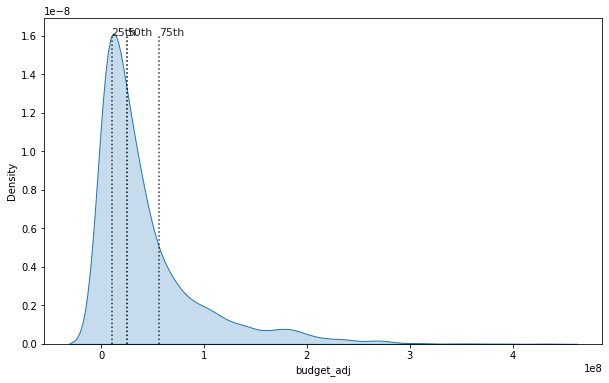

In [ ]:
plt.figure(figsize=(10, 6))

fig = sns.kdeplot(df.budget_adj, fill=True)

# Calculate percentiles
quant_25, quant_50, quant_75 = df.budget_adj.quantile(0.25), df.budget_adj.quantile(0.5), df.budget_adj.quantile(0.75)

# [quantile, opacity, length]
quants = [[quant_25, 0.8, 1.6e-8], [quant_50, 1, 1.6e-8],  [quant_75, 0.8, 1.6e-8]]

# # Plot the lines with a loop
for i in quants:
    plt.vlines(i[0], alpha = i[1], ymin=0, ymax = i[2], linestyle = ":")

plt.text(quant_25-0.5, quants[0][2], "25th", size = 11, alpha = 0.85)
plt.text(quant_50-0.5, quants[1][2], "50th", size = 11, alpha = 0.85)
plt.text(quant_75-0.5, quants[2][2], "75th", size = 11, alpha = 0.85)

plt.show()

In [ ]:
df.head(1)

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Adventure,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,Intercept
0,tt1179904,Paranormal Activity,2007,"Horror,Mystery","['nm2209370', 'nm2913790', 'nm2104166', 'nm291...","['Horror', 'Mystery']",0,0,0,0,...,0,0,0,283575.56000,239415489.60101,0.62500,0.00000,0.00000,0.50000,1


In [40]:
for n in np.quantile(df.budget_adj, [0.25, 0.5, 0.75, 1.0]):
  print(n)

10106896.551724136
25407222.269916374
55996168.36450669
431865063.97828615


In [67]:
# pd.cut(df.budget_adj, [0.0, 0.25, 0.5, 0.75, 1.0])

In [93]:
budget_bins, bins = pd.cut(df.budget_adj, bins=6, labels=range(6), retbins=True)

In [94]:
bins

array([-4.30613678e+05,  7.19785524e+07,  1.43955855e+08,  2.15933157e+08,
        2.87910459e+08,  3.59887762e+08,  4.31865064e+08])

In [95]:
df['budget_bins'] = budget_bins
df.head(2)

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,d_race,starpower_avg,starpower_max,actor_proportion,Intercept,budget_bins,budget_bin_0,budget_bin_1,budget_bin_2,budget_bin_3
0,tt1179904,Paranormal Activity,2007,"Horror,Mystery","['nm2209370', 'nm2913790', 'nm2104166', 'nm291...","['Horror', 'Mystery']",0,0,0,0,...,0.62500,0.00000,0.00000,0.50000,1,0,1,0,0,0
1,tt2309260,The Gallows,2015,"Horror,Mystery,Thriller","['nm3790547', 'nm6018502', 'nm4090362', 'nm225...","['Horror', 'Mystery', 'Thriller']",0,0,0,0,...,0.37500,0.00000,0.00000,0.50000,1,0,1,0,0,0


In [96]:
df.budget_bins.value_counts()

0    2881
1     437
2     162
3      50
4       7
5       3
Name: budget_bins, dtype: int64

In [97]:
for i in range(6):
  df[f'budget_bin_{i}'] = (df.budget_bins == i).astype(int)

In [98]:
cols_to_drop_X = ['tconst', 'primaryTitle', 'startYear', 'genres', 'nconst', 'genres_list', 'revenue_adj', 'budget_adj', 'budget_bins']
X = df.drop(columns=cols_to_drop_X, axis=1)
y = df[['revenue_adj']]

In [99]:
X.head()

,is_Family,is_Music,is_Romance,is_War,is_Comedy,is_Horror,is_Sci-Fi,is_History,is_Crime,is_Western,...,starpower_avg,starpower_max,actor_proportion,Intercept,budget_bin_0,budget_bin_1,budget_bin_2,budget_bin_3,budget_bin_4,budget_bin_5
0,0,0,0,0,0,1,0,0,0,0,...,0.00000,0.00000,0.50000,1,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0.00000,0.00000,0.50000,1,1,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0.00000,0.00000,0.50000,1,1,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0.00000,0.00000,0.75000,1,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1.36250,5.45000,1.00000,1,1,0,0,0,0,0


In [100]:
mod = sm.OLS(y, X)
res = mod.fit()

In [101]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            revenue_adj   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     147.0
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:14:02   Log-Likelihood:                -71618.
No. Observations:                3540   AIC:                         1.433e+05
Df Residuals:                    3509   BIC:                         1.435e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
is_Family         1.032e+07   1.17e+07  

In [102]:
coefs = pd.DataFrame(res.params, columns=['coefs']).reset_index().rename(columns={'index': 'coef names'})
coefs['std errors'] = res.bse.values
coefs['diff'] = abs(coefs['coefs']) - 2 * coefs['std errors']
coefs['significant'] = coefs['diff'] > 0
coefs['p_values'] = res.pvalues.values

pd.options.display.float_format = '{:.5f}'.format
coefs

,coef names,coefs,std errors,diff,significant,p_values
0,is_Family,10315873.98782,11659699.76018,-13003525.53254,False,0.37635
1,is_Music,15981970.20238,14642275.22501,-13302580.24764,False,0.27513
2,is_Romance,6468098.52320,7875978.36221,-9283858.20122,False,0.41156
3,is_War,-48757624.20581,23116693.38011,2524237.44560,True,0.03500
4,is_Comedy,-5525257.70162,7586233.59525,-9647209.48889,False,0.46646
5,is_Horror,-9209059.37339,9569501.36718,-9929943.36097,False,0.33595
6,is_Sci-Fi,14605897.39098,10282776.62044,-5959655.84990,False,0.15557
7,is_History,-21606088.17443,14592230.76974,-7578373.36506,False,0.13879
8,is_Crime,-7870366.58694,7369653.93780,-6868941.28866,False,0.28562
9,is_Western,-53684339.98270,32157444.88773,-10630549.79277,False,0.09512


## Group #0:
Budget within (3082.3419999999996, 8294379.446]

In [ ]:
df_groups[0].head(2)

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,Intercept,budget_bins
0,tt1179904,Paranormal Activity,2007,"Horror,Mystery","['nm2209370', 'nm2913790', 'nm2104166', 'nm291...","['Horror', 'Mystery']",0,0,0,0,...,0,0,283575.56000,239415489.60101,0.62500,0.00000,0.00000,0.50000,1,0
1,tt2309260,The Gallows,2015,"Horror,Mystery,Thriller","['nm3790547', 'nm6018502', 'nm4090362', 'nm225...","['Horror', 'Mystery', 'Thriller']",0,0,0,0,...,0,1,107856.48574,46016333.28795,0.37500,0.00000,0.00000,0.50000,1,0


In [ ]:
cols_to_drop_X = ['tconst', 'primaryTitle', 'startYear', 'genres', 'nconst', 'genres_list', 'revenue_adj', 'budget_adj', 'budget_bins']
X = df_groups[0].drop(columns=cols_to_drop_X, axis=1)
y = df_groups[0][['revenue_adj']]

In [ ]:
X.head()

,is_Family,is_Music,is_Romance,is_War,is_Comedy,is_Horror,is_Sci-Fi,is_History,is_Crime,is_Western,...,is_Fantasy,is_Action,is_Adventure,is_Documentary,is_Thriller,d_race,starpower_avg,starpower_max,actor_proportion,Intercept
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0.62500,0.00000,0.00000,0.50000,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0.37500,0.00000,0.00000,0.50000,1
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0.50000,0.00000,0.00000,0.50000,1
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.62500,0.00000,0.00000,0.75000,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0.62500,1.36250,5.45000,1.00000,1


In [ ]:
mod = sm.OLS(y, X)
res = mod.fit()

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            revenue_adj   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     4.030
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           2.39e-10
Time:                        18:23:40   Log-Likelihood:                -16685.
No. Observations:                 886   AIC:                         3.342e+04
Df Residuals:                     860   BIC:                         3.355e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
is_Family        -5.886e+05   7.98e+06  

In [ ]:
coefs = pd.DataFrame(res.params, columns=['coefs']).reset_index().rename(columns={'index': 'coef names'})
coefs['std errors'] = res.bse.values
coefs['diff'] = abs(coefs['coefs']) - 2 * coefs['std errors']
coefs['significant'] = coefs['diff'] > 0
coefs['p_values'] = res.pvalues.values

pd.options.display.float_format = '{:.5f}'.format
coefs

,coef names,coefs,std errors,diff,significant,p_values
0,is_Family,-588623.44465,7978670.81446,-15368718.18428,False,0.94121
1,is_Music,8660280.61530,8158927.49421,-7657574.37313,False,0.28878
2,is_Romance,2963269.98741,3558221.34675,-4153172.70610,False,0.40519
3,is_War,-2264081.97391,12651474.30662,-23038866.63932,False,0.85801
4,is_Comedy,2593606.35431,3304264.88987,-4014923.42543,False,0.43271
5,is_Horror,16810769.12744,4118366.88847,8574035.35050,True,0.00005
6,is_Sci-Fi,-7418201.79070,5660222.11058,-3902242.43045,False,0.19035
7,is_History,1930440.32919,9844363.21207,-17758286.09496,False,0.84458
8,is_Crime,-8138765.21446,3625750.03215,887265.15016,True,0.02504
9,is_Western,-3120708.97411,14235457.60274,-25350206.23137,False,0.82653


## Group #1:
Budget within (8294379.446, 20314200.892]

In [ ]:
df_groups[1].head(2)

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,Intercept,budget_bins
41,tt1504320,The King's Speech,2010,"Biography,Drama,History","['nm0000147', 'nm0001691', 'nm0000307', 'nm000...","['Biography', 'Drama', 'History']",0,0,0,0,...,0,0,17586000.00000,485621620.04760,0.00000,6.45220,6.72381,0.75000,1,1
47,tt2582846,The Fault in Our Stars,2014,"Drama,Romance","['nm0940362', 'nm5052065', 'nm1822659', 'nm000...","['Drama', 'Romance']",0,0,1,0,...,0,0,12958275.76679,331696045.11523,0.00000,4.81625,7.20000,0.50000,1,1


In [ ]:
cols_to_drop_X = ['tconst', 'primaryTitle', 'startYear', 'genres', 'nconst', 'genres_list', 'revenue_adj', 'budget_adj', 'budget_bins']
X = df_groups[1].drop(columns=cols_to_drop_X, axis=1)
y = df_groups[1][['revenue_adj']]

In [ ]:
X.head()

,is_Family,is_Music,is_Romance,is_War,is_Comedy,is_Horror,is_Sci-Fi,is_History,is_Crime,is_Western,...,is_Fantasy,is_Action,is_Adventure,is_Documentary,is_Thriller,d_race,starpower_avg,starpower_max,actor_proportion,Intercept
41,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0.00000,6.45220,6.72381,0.75000,1
47,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00000,4.81625,7.20000,0.50000,1
48,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0.37500,2.91751,6.01290,0.25000,1
49,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.00000,6.24815,6.85294,0.25000,1
50,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0.37500,2.90933,5.85397,0.75000,1


In [ ]:
mod = sm.OLS(y, X)
res = mod.fit()

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            revenue_adj   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     2.879
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           5.55e-06
Time:                        18:25:33   Log-Likelihood:                -17080.
No. Observations:                 884   AIC:                         3.421e+04
Df Residuals:                     859   BIC:                         3.433e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
is_Family         1.577e+07   1.03e+07  

In [ ]:
coefs = pd.DataFrame(res.params, columns=['coefs']).reset_index().rename(columns={'index': 'coef names'})
coefs['std errors'] = res.bse.values
coefs['diff'] = abs(coefs['coefs']) - 2 * coefs['std errors']
coefs['significant'] = coefs['diff'] > 0
coefs['p_values'] = res.pvalues.values

pd.options.display.float_format = '{:.5f}'.format
coefs

,coef names,coefs,std errors,diff,significant,p_values
0,is_Family,15765548.47190,10333117.28748,-4900686.10307,False,0.12745
1,is_Music,-9528355.23056,9611650.27420,-9694945.31783,False,0.32180
2,is_Romance,6588236.27828,6007324.08613,-5426411.89398,False,0.27308
3,is_War,-19069875.95620,15325415.71364,-11580955.47109,False,0.21372
4,is_Comedy,15663707.73679,6108929.97008,3445847.79662,True,0.01051
5,is_Horror,37002018.15887,7563220.46634,21875577.22619,True,0.00000
6,is_Sci-Fi,5955671.76865,10227700.02210,-14499728.27554,False,0.56051
7,is_History,956035.25127,10750821.96477,-20545608.67827,False,0.92916
8,is_Crime,-862817.05212,5914954.53228,-10967092.01244,False,0.88406
9,is_Western,-31586624.28773,30712905.93352,-29839187.57931,False,0.30403


## Group #2:
Budget within

In [ ]:
df_groups[2].head(2)

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,Intercept,budget_bins
63,tt0335345,The Passion of the Christ,2004,Drama,"['nm0001029', 'nm0000899', 'nm0411581', 'nm099...",['Drama'],0,0,0,0,...,0,0,40604941.12214,828204664.05911,0.37500,6.77817,7.46667,0.50000,1,2
66,tt1396484,It,2017,Horror,"['nm0803889', 'nm5897057', 'nm6016511', 'nm609...",['Horror'],0,0,0,0,...,0,0,36503869.76248,731999116.44195,0.62500,3.25417,6.80000,0.75000,1,2


In [ ]:
cols_to_drop_X = ['tconst', 'primaryTitle', 'startYear', 'genres', 'nconst', 'genres_list', 'revenue_adj', 'budget_adj', 'budget_bins']
X = df_groups[2].drop(columns=cols_to_drop_X, axis=1)
y = df_groups[2][['revenue_adj']]

In [ ]:
X.head()

,is_Family,is_Music,is_Romance,is_War,is_Comedy,is_Horror,is_Sci-Fi,is_History,is_Crime,is_Western,...,is_Fantasy,is_Action,is_Adventure,is_Documentary,is_Thriller,d_race,starpower_avg,starpower_max,actor_proportion,Intercept
63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.37500,6.77817,7.46667,0.50000,1
66,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0.62500,3.25417,6.80000,0.75000,1
71,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0.62500,6.19810,6.90000,0.50000,1
81,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.62500,3.51500,5.36000,0.75000,1
101,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0.00000,6.42648,6.97368,0.50000,1


In [ ]:
mod = sm.OLS(y, X)
res = mod.fit()

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            revenue_adj   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.793
Date:                Sat, 03 Dec 2022   Prob (F-statistic):             0.0126
Time:                        18:26:15   Log-Likelihood:                -17572.
No. Observations:                 885   AIC:                         3.519e+04
Df Residuals:                     861   BIC:                         3.531e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
is_Family          4.64e+06   1.54e+07  

In [ ]:
coefs = pd.DataFrame(res.params, columns=['coefs']).reset_index().rename(columns={'index': 'coef names'})
coefs['std errors'] = res.bse.values
coefs['diff'] = abs(coefs['coefs']) - 2 * coefs['std errors']
coefs['significant'] = coefs['diff'] > 0
coefs['p_values'] = res.pvalues.values

pd.options.display.float_format = '{:.5f}'.format
coefs

,coef names,coefs,std errors,diff,significant,p_values
0,is_Family,4639673.68279,15427268.02651,-26214862.37023,False,0.76368
1,is_Music,31034338.97885,19078534.53615,-7122730.09346,False,0.10417
2,is_Romance,-7705184.41378,11282194.91979,-14859205.42580,False,0.49482
3,is_War,-46067197.59256,43202284.91838,-40337372.24420,False,0.28658
4,is_Comedy,-13429743.61024,11459262.84041,-9488782.07059,False,0.24154
5,is_Horror,-6253567.41399,15001605.46848,-23749643.52298,False,0.67688
6,is_Sci-Fi,-6399143.10479,16997602.24831,-27596061.39182,False,0.70666
7,is_History,-24146079.50892,18465922.93994,-12785766.37095,False,0.19136
8,is_Crime,-8467360.83735,10100487.26288,-11733613.68841,False,0.40209
9,is_Western,-23554755.54069,43240725.86744,-62926696.19419,False,0.58608


## Group #3:
Budget within

In [ ]:
df_groups[3].head(2)

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,Intercept,budget_bins
108,tt1259571,The Twilight Saga: New Moon,2009,"Adventure,Drama,Fantasy","['nm0829576', 'nm1500155', 'nm1210124', 'nm041...","['Adventure', 'Drama', 'Fantasy']",0,0,0,0,...,0,0,59579225.53105,845819408.93262,0.00000,2.94881,6.12857,0.50000,1,3
114,tt1431045,Deadpool,2016,"Action,Adventure,Comedy","['nm0005351', 'nm1072555', 'nm2554352', 'nm453...","['Action', 'Adventure', 'Comedy']",0,0,0,0,...,0,0,61778141.18288,834111420.00545,0.37500,5.76399,6.42000,0.75000,1,3


In [ ]:
cols_to_drop_X = ['tconst', 'primaryTitle', 'startYear', 'genres', 'nconst', 'genres_list', 'revenue_adj', 'budget_adj', 'budget_bins']
X = df_groups[3].drop(columns=cols_to_drop_X, axis=1)
y = df_groups[3][['revenue_adj']]

In [ ]:
X.head()

,is_Family,is_Music,is_Romance,is_War,is_Comedy,is_Horror,is_Sci-Fi,is_History,is_Crime,is_Western,...,is_Fantasy,is_Action,is_Adventure,is_Documentary,is_Thriller,d_race,starpower_avg,starpower_max,actor_proportion,Intercept
108,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0.00000,2.94881,6.12857,0.50000,1
114,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0.37500,5.76399,6.42000,0.75000,1
128,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0.37500,5.76540,6.51714,0.25000,1
133,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.37500,7.03667,8.80000,1.00000,1
136,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0.00000,4.78431,6.67059,0.50000,1


In [ ]:
mod = sm.OLS(y, X)
res = mod.fit()

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            revenue_adj   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     11.12
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           2.19e-35
Time:                        18:26:47   Log-Likelihood:                -18548.
No. Observations:                 885   AIC:                         3.714e+04
Df Residuals:                     861   BIC:                         3.726e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
is_Family         2.116e+06   4.55e+07  

In [ ]:
coefs = pd.DataFrame(res.params, columns=['coefs']).reset_index().rename(columns={'index': 'coef names'})
coefs['std errors'] = res.bse.values
coefs['diff'] = abs(coefs['coefs']) - 2 * coefs['std errors']
coefs['significant'] = coefs['diff'] > 0
coefs['p_values'] = res.pvalues.values

pd.options.display.float_format = '{:.5f}'.format
coefs

,coef names,coefs,std errors,diff,significant,p_values
0,is_Family,2115851.25914,45466051.07788,-88816250.89662,False,0.96289
1,is_Music,-101019304.83057,104033296.98307,-107047289.13557,False,0.33181
2,is_Romance,-53079635.96726,44962877.15507,-36846118.34288,False,0.23812
3,is_War,-162320508.57631,95660715.05578,-29000921.53526,False,0.09009
4,is_Comedy,-143542732.76586,40725854.08231,62091024.60124,True,0.00045
5,is_Horror,-138164356.85444,59074463.03722,20015430.78000,True,0.01957
6,is_Sci-Fi,49980825.01948,38735271.22931,-27489717.43913,False,0.19729
7,is_History,-113509253.41782,66306579.21157,-19103905.00532,False,0.08728
8,is_Crime,-96021713.80694,36549669.63654,22922374.53385,True,0.00876
9,is_Western,-195512811.21817,143727865.47108,-91942919.72400,False,0.17409


## Groups 2 & 3:
Budget within

In [ ]:
df_g23 = df[df.budget_bins > 1]
print(df_g23.shape)
df_g23.head()

(1770, 35)


,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,Intercept,budget_bins
63,tt0335345,The Passion of the Christ,2004,Drama,"['nm0001029', 'nm0000899', 'nm0411581', 'nm099...",['Drama'],0,0,0,0,...,0,0,40604941.12214,828204664.05911,0.37500,6.77817,7.46667,0.50000,1,2
66,tt1396484,It,2017,Horror,"['nm0803889', 'nm5897057', 'nm6016511', 'nm609...",['Horror'],0,0,0,0,...,0,0,36503869.76248,731999116.44195,0.62500,3.25417,6.80000,0.75000,1,2
71,tt7286456,Joker,2019,"Crime,Drama,Thriller","['nm0001618', 'nm0000134', 'nm5939164', 'nm017...","['Crime', 'Drama', 'Thriller']",0,0,0,0,...,0,1,55000000.00000,1074251311.00000,0.62500,6.19810,6.90000,0.50000,1,2
81,tt1727824,Bohemian Rhapsody,2018,"Biography,Drama,Music","['nm1785339', 'nm2377903', 'nm3152605', 'nm522...","['Biography', 'Drama', 'Music']",0,1,0,0,...,0,0,52939215.00521,910175313.83571,0.62500,3.51500,5.36000,0.75000,1,2
101,tt3783958,La La Land,2016,"Comedy,Drama,Music","['nm0331516', 'nm1297015', 'nm1679669', 'nm079...","['Comedy', 'Drama', 'Music']",0,1,0,0,...,0,0,31954210.95666,476551995.65549,0.00000,6.42648,6.97368,0.50000,1,2


In [ ]:
cols_to_drop_X = ['tconst', 'primaryTitle', 'startYear', 'genres', 'nconst', 'genres_list', 'revenue_adj', 'budget_adj', 'budget_bins']
X = df_g23.drop(columns=cols_to_drop_X, axis=1)
y = df_g23[['revenue_adj']]

In [ ]:
X.head()

,is_Family,is_Music,is_Romance,is_War,is_Comedy,is_Horror,is_Sci-Fi,is_History,is_Crime,is_Western,...,is_Fantasy,is_Action,is_Adventure,is_Documentary,is_Thriller,d_race,starpower_avg,starpower_max,actor_proportion,Intercept
63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.37500,6.77817,7.46667,0.50000,1
66,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0.62500,3.25417,6.80000,0.75000,1
71,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0.62500,6.19810,6.90000,0.50000,1
81,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.62500,3.51500,5.36000,0.75000,1
101,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0.00000,6.42648,6.97368,0.50000,1


In [ ]:
mod = sm.OLS(y, X)
res = mod.fit()

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            revenue_adj   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     23.21
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           1.20e-84
Time:                        18:28:28   Log-Likelihood:                -36716.
No. Observations:                1770   AIC:                         7.348e+04
Df Residuals:                    1746   BIC:                         7.361e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
is_Family         1.229e+07   2.55e+07  

In [ ]:
coefs = pd.DataFrame(res.params, columns=['coefs']).reset_index().rename(columns={'index': 'coef names'})
coefs['std errors'] = res.bse.values
coefs['diff'] = abs(coefs['coefs']) - 2 * coefs['std errors']
coefs['significant'] = coefs['diff'] > 0
coefs['p_values'] = res.pvalues.values

pd.options.display.float_format = '{:.5f}'.format
coefs

,coef names,coefs,std errors,diff,significant,p_values
0,is_Family,12293503.59045,25531137.60916,-38768771.62788,False,0.63021
1,is_Music,20432586.11540,39780166.78402,-59127747.45263,False,0.60757
2,is_Romance,-16487702.97541,21548964.83065,-26610226.68588,False,0.44430
3,is_War,-83209993.62016,61107916.86643,-39005840.11269,False,0.17347
4,is_Comedy,-98294729.50469,20794019.17289,56706691.15891,True,0.00000
5,is_Horror,-100304529.88258,28240045.83693,43824438.20872,True,0.00039
6,is_Sci-Fi,90625284.12546,23015399.19150,44594485.74245,True,0.00009
7,is_History,-78176529.79586,33954711.13897,10267107.51792,True,0.02143
8,is_Crime,-61013288.32419,18489600.47705,24034087.37008,True,0.00099
9,is_Western,-134977161.70251,76784385.90457,-18591610.10663,False,0.07894


# Test regression #5 - Log of budget

In [ ]:
df['ln_budget_adj'] = np.log(df.budget_adj)

In [ ]:
df.head(2)

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,Intercept,ln_budget_adj
0,tt1179904,Paranormal Activity,2007,"Horror,Mystery","['nm2209370', 'nm2913790', 'nm2104166', 'nm291...","['Horror', 'Mystery']",0,0,0,0,...,0,0,283575.56000,239415489.60101,0.62500,0.00000,0.00000,0.50000,1,12.55523
1,tt2309260,The Gallows,2015,"Horror,Mystery,Thriller","['nm3790547', 'nm6018502', 'nm4090362', 'nm225...","['Horror', 'Mystery', 'Thriller']",0,0,0,0,...,0,1,107856.48574,46016333.28795,0.37500,0.00000,0.00000,0.50000,1,11.58856


In [ ]:
cols_to_drop_X = ['tconst', 'primaryTitle', 'startYear', 'genres', 'nconst', 'genres_list', 'revenue_adj', 'budget_adj']
X = df.drop(columns=cols_to_drop_X, axis=1)

In [ ]:
X.head()

,is_Family,is_Music,is_Romance,is_War,is_Comedy,is_Horror,is_Sci-Fi,is_History,is_Crime,is_Western,...,is_Action,is_Adventure,is_Documentary,is_Thriller,d_race,starpower_avg,starpower_max,actor_proportion,Intercept,ln_budget_adj
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0.62500,0.00000,0.00000,0.50000,1,12.55523
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0.37500,0.00000,0.00000,0.50000,1,11.58856
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0.50000,0.00000,0.00000,0.50000,1,9.37532
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0.62500,0.00000,0.00000,0.75000,1,12.19233
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0.62500,1.36250,5.45000,1.00000,1,13.20191


In [ ]:
y = df['revenue_adj']

In [ ]:
mod = sm.OLS(y, X)
res = mod.fit()

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            revenue_adj   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     67.82
Date:                Sat, 03 Dec 2022   Prob (F-statistic):          1.86e-286
Time:                        18:12:02   Log-Likelihood:                -72338.
No. Observations:                3540   AIC:                         1.447e+05
Df Residuals:                    3513   BIC:                         1.449e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
is_Family         -8.86e+05   1.44e+07  

In [ ]:
coefs = pd.DataFrame(res.params, columns=['coefs']).reset_index().rename(columns={'index': 'coef names'})
coefs['std errors'] = res.bse.values
coefs['diff'] = abs(coefs['coefs']) - 2 * coefs['std errors']
coefs['significant'] = coefs['diff'] > 0
coefs['p_values'] = res.pvalues.values

pd.options.display.float_format = '{:.5f}'.format
coefs

,coef names,coefs,std errors,diff,significant,p_values
0,is_Family,-886038.28102,14376665.68076,-27867293.08049,False,0.95086
1,is_Music,-16237508.42959,17985842.86721,-19734177.30484,False,0.36670
2,is_Romance,-11905839.50645,9680854.51314,-7455869.51982,False,0.21884
3,is_War,-59450030.85386,28315252.11160,2819526.63065,True,0.03584
4,is_Comedy,-51332165.83173,9237259.05299,32857647.72575,True,0.00000
5,is_Horror,-38861540.25952,11679380.14123,15502779.97705,True,0.00089
6,is_Sci-Fi,70556328.55432,12479069.02571,45598190.50289,True,0.00000
7,is_History,-44715953.30878,17908062.26137,8899828.78604,True,0.01257
8,is_Crime,-38046010.73417,9008754.76457,20028501.20504,True,0.00002
9,is_Western,-69534121.60676,39384891.98108,-9235662.35540,False,0.07757


# Plot distributions of the variables

In [ ]:
df.head(2)

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,Intercept,budget_bins
0,tt1179904,Paranormal Activity,2007,"Horror,Mystery","['nm2209370', 'nm2913790', 'nm2104166', 'nm291...","['Horror', 'Mystery']",0,0,0,0,...,0,0,283575.56000,239415489.60101,0.62500,0.00000,0.00000,0.50000,1,0
1,tt2309260,The Gallows,2015,"Horror,Mystery,Thriller","['nm3790547', 'nm6018502', 'nm4090362', 'nm225...","['Horror', 'Mystery', 'Thriller']",0,0,0,0,...,0,1,107856.48574,46016333.28795,0.37500,0.00000,0.00000,0.50000,1,0


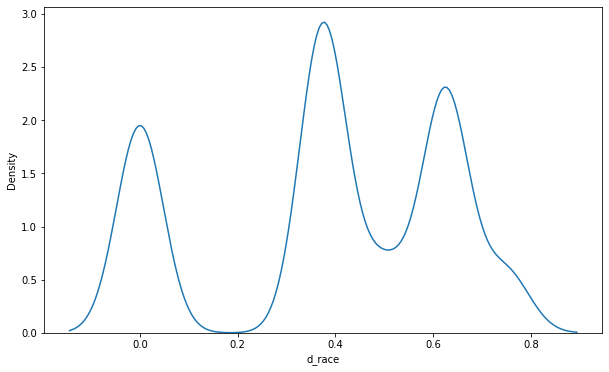

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df.d_race)

plt.show()

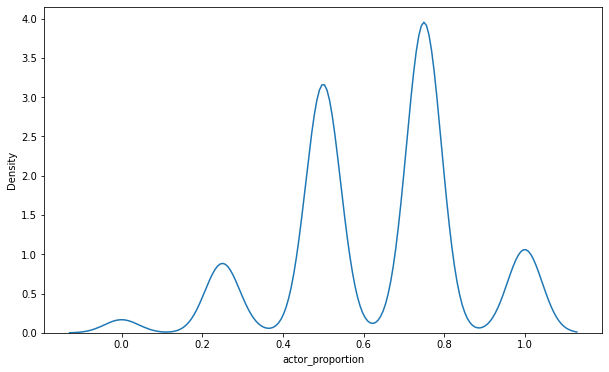

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df.actor_proportion)

plt.show()

# Test regression #6 - Scaling/standardizing budget

In [ ]:
df.head(2)

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Adventure,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,profit
0,tt1179904,Paranormal Activity,2007,"Horror,Mystery","['nm2209370', 'nm2913790', 'nm2104166', 'nm291...","['Horror', 'Mystery']",False,False,False,False,...,False,False,False,283575.559996,2.394155e+08,0.625,0.0,0.0,0.5,2.391319e+08
1,tt2309260,The Gallows,2015,"Horror,Mystery,Thriller","['nm3790547', 'nm6018502', 'nm4090362', 'nm225...","['Horror', 'Mystery', 'Thriller']",False,False,False,False,...,False,False,True,107856.485741,4.601633e+07,0.375,0.0,0.0,0.5,4.590848e+07


In [ ]:
df['budget_adj_std'] = (df.budget_adj - df.budget_adj.mean()) / df.budget_adj.std()

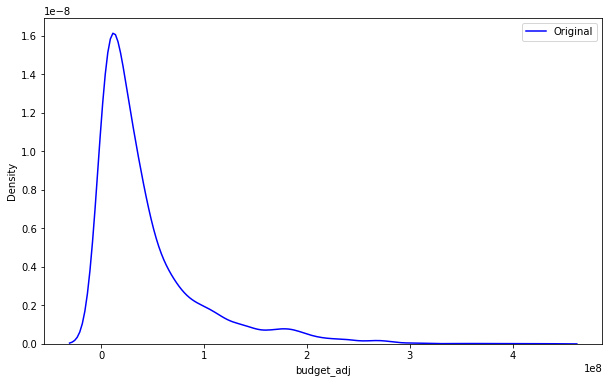

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df.budget_adj, color='blue', label='Original')

plt.legend()
plt.show()

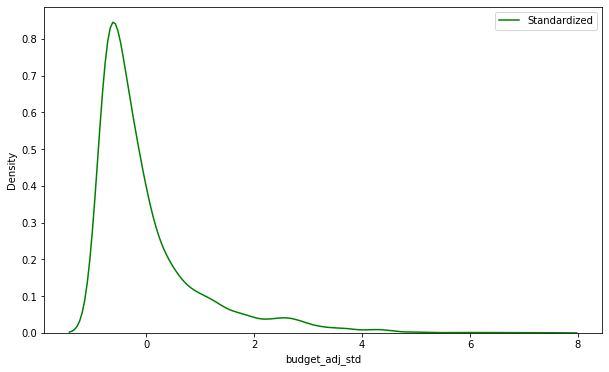

In [ ]:
plt.figure(figsize=(10, 6))

# sns.kdeplot(df.budget_adj, color='blue', label='Original')
sns.kdeplot(df.budget_adj_std, color='green', label='Standardized')

plt.legend()
plt.show()

In [ ]:
df.head(2)

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,profit,budget_adj_std
0,tt1179904,Paranormal Activity,2007,"Horror,Mystery","['nm2209370', 'nm2913790', 'nm2104166', 'nm291...","['Horror', 'Mystery']",False,False,False,False,...,False,False,283575.559996,2.394155e+08,0.625,0.0,0.0,0.5,2.391319e+08,-0.835885
1,tt2309260,The Gallows,2015,"Horror,Mystery,Thriller","['nm3790547', 'nm6018502', 'nm4090362', 'nm225...","['Horror', 'Mystery', 'Thriller']",False,False,False,False,...,False,True,107856.485741,4.601633e+07,0.375,0.0,0.0,0.5,4.590848e+07,-0.839236


In [ ]:
cols_to_drop_X = ['tconst', 'primaryTitle', 'startYear', 'genres', 'nconst', 'genres_list', 'revenue_adj', 'budget_adj', 'budget_bins']
y = df[['revenue_adj']]
X = df.drop(columns=cols_to_drop_X, axis=1)
X.head()

KeyError: ignored

In [ ]:
mod = sm.OLS(y, X)
res = mod.fit()

In [ ]:
print(res.summary())

In [ ]:
coefs = pd.DataFrame(res.params, columns=['coefs']).reset_index().rename(columns={'index': 'coef names'})
coefs['std errors'] = res.bse.values
coefs['diff'] = abs(coefs['coefs']) - 2 * coefs['std errors']
coefs['significant'] = coefs['diff'] > 0
coefs['p_values'] = res.pvalues.values

pd.options.display.float_format = '{:.5f}'.format
coefs

# Try some matching

In [ ]:
df.head(2)

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,Intercept,budget_bins,budget_adj_std
0,tt1179904,Paranormal Activity,2007,"Horror,Mystery","['nm2209370', 'nm2913790', 'nm2104166', 'nm291...","['Horror', 'Mystery']",0,0,0,0,...,0,283575.56000,239415489.60101,0.62500,0.00000,0.00000,0.50000,1,0,-0.83589
1,tt2309260,The Gallows,2015,"Horror,Mystery,Thriller","['nm3790547', 'nm6018502', 'nm4090362', 'nm225...","['Horror', 'Mystery', 'Thriller']",0,0,0,0,...,1,107856.48574,46016333.28795,0.37500,0.00000,0.00000,0.50000,1,0,-0.83924


In [ ]:
df.groupby(by=['genres', 'startYear']).count().sort_values(by='tconst', ascending=False)

tconst  primaryTitle  nconst  genres_list  \
genres                  startYear                                              
Comedy,Romance          2009           16            16      16           16   
Comedy,Drama,Romance    2010           16            16      16           16   
                        2004           13            13      13           13   
Comedy                  2006           13            13      13           13   
Drama                   2007           12            12      12           12   
...                                   ...           ...     ...          ...   
Biography,Drama,Sport   2001            1             1       1            1   
                        2000            1             1       1            1   
Biography,Drama,Romance 2017            1             1       1            1   
                        2016            1             1       1            1   
Thriller                2018            1             1       1            1   

                                   is_Family  is_Music  is_Romance  is_War  \
genres                  startYear                                            
Comedy,Romance          2009              16        16          16      16   
Comedy,Drama,Romance    2010              16        16          16      16   
                        2004              13        13          13      13   
Comedy                  2006              13        13          13      13   
Drama                   2007              12        12          12      12   
...                                      ...       ...         ...     ...   
Biography,Drama,Sport   2001               1         1           1       1   
                        2000               1         1           1       1   
Biography,Drama,Romance 2017               1         1           1       1   
                        2016               1         1           1       1   
Thriller                2018               1         1           1       1   

                                   is_Comedy  is_Horror  ...  is_Thriller  \
genres                  startYear                        ...                
Comedy,Romance          2009              16         16  ...           16   
Comedy,Drama,Romance    2010              16         16  ...           16   
                        2004              13         13  ...           13   
Comedy                  2006              13         13  ...           13   
Drama                   2007              12         12  ...           12   
...                                      ...        ...  ...          ...   
Biography,Drama,Sport   2001               1          1  ...            1   
                        2000               1          1  ...            1   
Biography,Drama,Romance 2017               1          1  ...            1   
                        2016               1          1  ...            1   
Thriller                2018               1          1  ...            1   

                                   budget_adj  revenue_adj  d_race  \
genres                  startYear                                    
Comedy,Romance          2009               16           16      16   
Comedy,Drama,Romance    2010               16           16      16   
                        2004               13           13      13   
Comedy                  2006               13           13      13   
Drama                   2007               12           12      12   
...                                       ...          ...     ...   
Biography,Drama,Sport   2001                1            1       1   
                        2000                1            1       1   
Biography,Drama,Romance 2017                1            1       1   
                        2016                1            1       1   
Thriller                2018                1            1       1   

                                   starpower_avg  starpower_max  \

# Test regression #7: Profit as dependent variable
profit = revenue - budget

In [ ]:
df.head(2)

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,profit,Intercept
0,tt1179904,Paranormal Activity,2007,"Horror,Mystery","['nm2209370', 'nm2913790', 'nm2104166', 'nm291...","['Horror', 'Mystery']",0,0,0,0,...,0,0,283575.559996,2.394155e+08,0.625,0.0,0.0,0.5,2.391319e+08,1
1,tt2309260,The Gallows,2015,"Horror,Mystery,Thriller","['nm3790547', 'nm6018502', 'nm4090362', 'nm225...","['Horror', 'Mystery', 'Thriller']",0,0,0,0,...,0,1,107856.485741,4.601633e+07,0.375,0.0,0.0,0.5,4.590848e+07,1


In [ ]:
df['profit'] = df.revenue_adj - df.budget_adj

In [ ]:
df.profit.describe()

count         3540.00000
mean      76864483.83394
std      185768263.67240
min     -161309948.88432
25%       -4351253.93059
50%       13566378.80891
75%       81499193.13322
max     3197446940.32889
Name: profit, dtype: float64

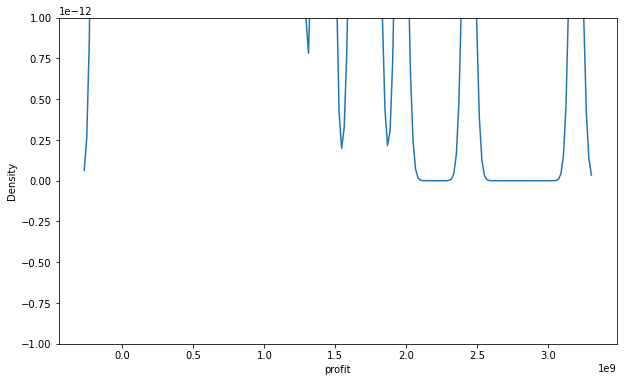

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df['profit'])

plt.show()

In [ ]:
cols_to_drop_X = ['tconst', 'primaryTitle', 'startYear', 'genres', 'nconst', 'genres_list', 'revenue_adj', 'budget_adj', 'profit']
y = df[['profit']]
X = df.drop(columns=cols_to_drop_X, axis=1)
X.head()

,is_Family,is_Music,is_Romance,is_War,is_Comedy,is_Horror,is_Sci-Fi,is_History,is_Crime,is_Western,...,is_Fantasy,is_Action,is_Adventure,is_Documentary,is_Thriller,d_race,starpower_avg,starpower_max,actor_proportion,Intercept
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0.625,0.0000,0.00,0.50,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0.375,0.0000,0.00,0.50,1
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0.500,0.0000,0.00,0.50,1
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.625,0.0000,0.00,0.75,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0.625,1.3625,5.45,1.00,1


In [ ]:
mod = sm.OLS(y, X)
res = mod.fit()

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     30.82
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          2.38e-131
Time:                        16:14:28   Log-Likelihood:                -72073.
No. Observations:                3540   AIC:                         1.442e+05
Df Residuals:                    3514   BIC:                         1.444e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
is_Family         1.958e+07   1.32e+07  

In [ ]:
coefs = pd.DataFrame(res.params, columns=['coefs']).reset_index().rename(columns={'index': 'coef names'})
coefs['std errors'] = res.bse.values
coefs['diff'] = abs(coefs['coefs']) - 2 * coefs['std errors']
coefs['significant'] = coefs['diff'] > 0
coefs['p_values'] = res.pvalues.values

pd.options.display.float_format = '{:.5f}'.format
coefs

,coef names,coefs,std errors,diff,significant,p_values
0,is_Family,19576140.15181,13210401.27402,-6844662.39623,False,0.13846
1,is_Music,8141377.03540,16639011.60567,-25136646.17593,False,0.62466
2,is_Romance,1108545.19925,8950557.51435,-16792569.82944,False,0.90144
3,is_War,-41523861.55775,26247416.18745,-10970970.81715,False,0.11374
4,is_Comedy,-35324854.69118,8562489.76704,18199875.15710,True,0.00004
5,is_Horror,-34319674.07131,10815648.71109,12688376.64912,True,0.00152
6,is_Sci-Fi,65442128.24098,11522114.20895,42397899.82309,True,0.00000
7,is_History,-27423379.14898,16574516.87593,-5725654.60287,False,0.09810
8,is_Crime,-27140746.73675,8353072.83164,10434601.07346,True,0.00117
9,is_Western,-55918757.98774,36535262.95153,-17151767.91533,False,0.12597


# Test regression #8: ROI as dependent variable
ROI = revenue / budget

In [ ]:
df['ROI'] = df.revenue_adj / df.budget_adj

In [ ]:
df.ROI.describe()

count   3540.00000
mean       3.71015
std       17.83701
min        0.00012
25%        0.59103
50%        1.71291
75%        3.46628
max      844.27406
Name: ROI, dtype: float64

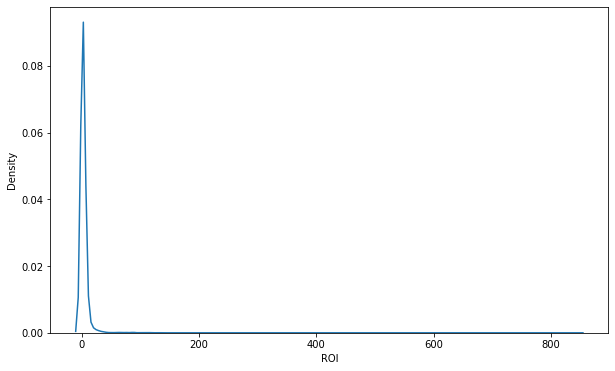

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df['ROI'])

plt.show()

In [ ]:
cols_to_drop_X = ['tconst', 'primaryTitle', 'startYear', 'genres', 'nconst', 'genres_list', 'revenue_adj', 'budget_adj', 'profit', 'ROI']
y = df[['ROI']]
X = df.drop(columns=cols_to_drop_X, axis=1)
X.head()

,is_Family,is_Music,is_Romance,is_War,is_Comedy,is_Horror,is_Sci-Fi,is_History,is_Crime,is_Western,...,is_Fantasy,is_Action,is_Adventure,is_Documentary,is_Thriller,d_race,starpower_avg,starpower_max,actor_proportion,Intercept
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0.62500,0.00000,0.00000,0.50000,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0.37500,0.00000,0.00000,0.50000,1
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0.50000,0.00000,0.00000,0.50000,1
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.62500,0.00000,0.00000,0.75000,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0.62500,1.36250,5.45000,1.00000,1


In [ ]:
mod = sm.OLS(y, X)
res = mod.fit()

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROI   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     7.222
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           8.81e-25
Time:                        16:18:52   Log-Likelihood:                -15134.
No. Observations:                3540   AIC:                         3.032e+04
Df Residuals:                    3514   BIC:                         3.048e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
is_Family           -0.8702      1.366  

In [ ]:
coefs = pd.DataFrame(res.params, columns=['coefs']).reset_index().rename(columns={'index': 'coef names'})
coefs['std errors'] = res.bse.values
coefs['diff'] = abs(coefs['coefs']) - 2 * coefs['std errors']
coefs['significant'] = coefs['diff'] > 0
coefs['p_values'] = res.pvalues.values

pd.options.display.float_format = '{:.5f}'.format
coefs

,coef names,coefs,std errors,diff,significant,p_values
0,is_Family,-0.87015,1.36594,-1.86173,False,0.52414
1,is_Music,0.31982,1.72046,-3.12109,False,0.85254
2,is_Romance,0.07391,0.92548,-1.77704,False,0.93635
3,is_War,-1.53617,2.71396,-3.89174,False,0.57141
4,is_Comedy,-0.57775,0.88535,-1.19295,False,0.51408
5,is_Horror,3.99284,1.11833,1.75618,True,0.00036
6,is_Sci-Fi,-0.36884,1.19137,-2.01391,False,0.75689
7,is_History,-0.10474,1.71379,-3.32283,False,0.95127
8,is_Crime,-1.16664,0.86370,-0.56076,False,0.17686
9,is_Western,-1.22409,3.77771,-6.33132,False,0.74593
